# Preliminary data exploration

In this notebook we will quickly explore our data to understand it better and find any anomaly that we would have to deal with later on.

In [5]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [6]:
df_07 = pd.read_csv("../02_data_pipeline/data/raw_data/2022_07.csv")
df_08 = pd.read_csv("../02_data_pipeline/data/raw_data/2022_08.csv")
df_09 = pd.read_csv("../02_data_pipeline/data/raw_data/2022_09.csv")
print("df_07 columns:", df_07.columns)
print("df_08 columns:", df_08.columns)
print("df_09 columns:", df_09.columns)

df_07 columns: Index(['id', 'user_id', 'completed_at', 'item_total', 'shipment_total'], dtype='object')
df_08 columns: Index(['id', 'user_id', 'completed_at', 'item_total', 'shipment_total'], dtype='object')
df_09 columns: Index(['id', 'user_id', 'completed_at', 'item_total', 'shipment_total'], dtype='object')


Each file follows the same structure:
Each row represents one order and is defined by 5 columns ['id', 'user_id', 'completed_at', 'item_total', 'shipment_total'].
To simplify further exploration we will concatenate the dataframes.

In [7]:
df = pd.concat([df_07, df_08, df_09])
df.head()

,id,user_id,completed_at,item_total,shipment_total
0,236777,7258,2022-07-01 00:19,39.14,2.5
1,251366,28710,2022-07-01 06:21,46.95,2.5
2,251363,28709,2022-07-01 06:22,48.93,2.5
3,251370,28711,2022-07-01 06:38,60.86,2.5
4,230933,23483,2022-07-01 07:43,49.90,5.0


In [8]:
df.dtypes

id                  int64
user_id             int64
completed_at       object
item_total        float64
shipment_total    float64
dtype: object

In [9]:
df["completed_at"] = pd.to_datetime(df["completed_at"])

In [10]:
len(df.index)

4357

In [11]:
df.isnull().sum()

id                0
user_id           0
completed_at      0
item_total        0
shipment_total    0
dtype: int64

In [12]:
df.isna().sum()

id                0
user_id           0
completed_at      0
item_total        0
shipment_total    0
dtype: int64

There is no NaN or null in our data so we can proceed to plotting our different features to understand them and check for problematic outliers

### Quantitative features


(item_total, shipment_total)

[Text(1, 0, 'shipment_total')]

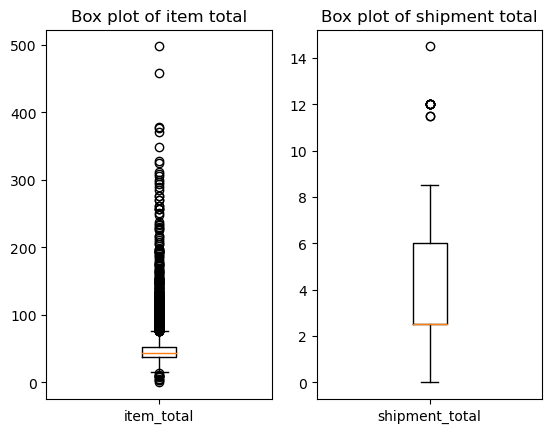

In [13]:
%matplotlib inline
fig, (ax1, ax2) =plt.subplots(1,2)
ax1.boxplot(df['item_total'], )
ax1.set_title("Box plot of item total")
ax1.set_xticklabels(["item_total"])
ax2.boxplot(df['shipment_total'])
ax2.set_title("Box plot of shipment total")
ax2.set_xticklabels(["shipment_total"])


In [14]:
free_orders = df.loc[(df["item_total"]) == 0 & (df["shipment_total"] == 0)]
free_orders.head()

,id,user_id,completed_at,item_total,shipment_total
9,247792,4493,2022-07-01 09:42:00,0.0,0.0


Interestingly there is an order with an item total and a shipment total of 0 which would represent a "free" order. This kind of data is to be discussed with the business team as it could be an unwanted behavior of the platform depending on our processes.

In [20]:
print(df["shipment_total"].mean())
high_shipment_orders = df.loc[df["shipment_total"] > 10]
high_shipment_orders.head()

3.760500344273583


,id,user_id,completed_at,item_total,shipment_total
687,258224,24793,2022-08-12 17:13:00,348.43,11.5
1099,263222,34932,2022-08-21 10:12:00,50.44,14.5
1626,264845,35829,2022-08-31 08:58:00,37.79,12.0
130,265446,36177,2022-09-04 12:43:00,41.11,12.0
255,265899,36419,2022-09-07 15:56:00,36.68,12.0


The quantitative features don't show any anomaly in their distribution which is almost continuous and doesn't present any extreme outliers.
We can see some orders with higher shipment totals (3 times higher than the mean value). As they represent ~1 per thousand order and the value is not extreme, we won't take any action about them. This could be investigated further with a business team.

### Dates

As we parsed our date column as a datetime before, we will simply verify that our record are within our observation period (2022 07-09)

In [16]:
%matplotlib inline

outside_scope_records = df.loc[(df["completed_at"] < datetime.datetime(2022,7,1,0,0) )| (df["completed_at"] > datetime.datetime(2022,9,30,23,59))]
outside_scope_records

,id,user_id,completed_at,item_total,shipment_total


No records are outside of our time window.

### Ids
The only unique id in the dataframe should be the column "id" so we will finish our preliminary exploration with this unicity of this column.

In [17]:
has_duplicate = df["id"].duplicated().any()
has_duplicate

False

There are no duplicates in order ids.

At first glance our data doesn't seem to have any anomaly. We will proceed with the next steps using this work as a blueprint for our data ingestion.